<a href="https://colab.research.google.com/github/arrow789/cs760-project/blob/master/Death_Prediction_Model_using_augmented_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

from sklearn.ensemble import RandomForestRegressor

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import BaggingRegressor
from sklearn.svm import SVR
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression


from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

from sklearn.metrics import r2_score

from sklearn import metrics 

In [ ]:
death_df = pd.read_csv("Augmented CT Data")

In [ ]:
death_df.head()

,Age at CT,DEATH [d from CT],L1_HU_BMD,TAT Area (cm2),Total Body Area EA (cm2),VAT Area (cm2),SAT Area (cm2),VAT/SAT Ratio,Muscle HU,Muscle Area (cm2),L3 SMI (cm2/m2),AoCa Agatston,Liver HU (Median)
0,73.0,967.0,135.0,407.463977,721.279362,212.316698,199.007129,1.220394,18.2,170.1,58.7,5473.6,35.0
1,55.0,359.0,192.0,485.500000,694.300000,183.500000,302.000000,0.610000,16.2,124.0,48.4,2709.1,52.0
2,60.0,2351.0,149.0,289.100000,584.500000,144.000000,145.100000,0.990000,30.8,212.3,69.1,2586.6,57.0
3,88.0,658.0,106.0,315.500000,588.900000,202.300000,113.200000,1.790000,-3.2,168.9,47.8,431.5,53.0
4,82.0,1970.0,77.0,213.500000,452.900000,113.600000,99.900000,1.140000,1.5,89.5,30.9,1600.0,49.0


In [ ]:
death_df.shape

(949, 13)

In [ ]:
death_df["Years alive after CT"] = death_df['DEATH [d from CT]']/365
#death_df['Age at Death'] = death_df['Age at CT'] + death_df['Death']

## Predicting Age at death as a continuous variable

In [ ]:
death_df['Age at Death'] = death_df['Age at CT'] + death_df['Years alive after CT']

In [ ]:
X = np.array(death_df.iloc[:,2:13])
Y = np.array(death_df.iloc[:,-1])

Y = Y.reshape(-1,1)

In [ ]:
X.shape

(949, 11)

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
#Y_scaled = scaler.fit_transform(Y)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y, test_size = 0.30)

### Model 1: Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor

clf = RandomForestRegressor() 
 
clf.fit(X_train, y_train)

/var/folders/f0/16ccpfvn15x4cfm0wxybq2mw0000gn/T/ipykernel_95046/936050519.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


RandomForestRegressor()

In [ ]:
###Evaluation on training data
y_pred = clf.predict(X_train)

print("Evaluation on training data")
print("MAE",mean_absolute_error(y_train,y_pred))
print("MSE",mean_squared_error(y_train,y_pred))

r2 = r2_score(y_train,y_pred)
print("R2 score",r2)
print()
###Evaluation on testing dataset
y_pred = clf.predict(X_test)

print("Evaluation on testing data")
print("MAE",mean_absolute_error(y_test,y_pred))
print("MSE",mean_squared_error(y_test,y_pred))

r2 = r2_score(y_test,y_pred)
print("R2 score", r2)

Evaluation on training data
MAE 1.8260958646878793
MSE 7.747209005433584
R2 score 0.9205791233935053

Evaluation on testing data
MAE 4.5928462622908635
MSE 50.307815351531104
R2 score 0.4777936844371482


Text(0.5, 1.0, 'Random Forest Regressor')

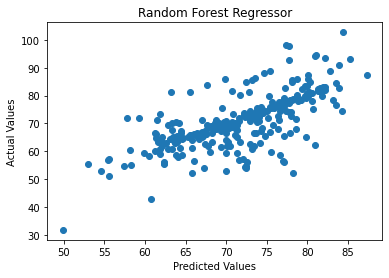

In [ ]:
plt.scatter(y_pred,y_test)
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.title("Random Forest Regressor")

### Model 2: Linear Regression

In [ ]:
clf = LinearRegression().fit(X_train, y_train)

In [ ]:
###Evaluation on training data
y_pred = clf.predict(X_train)

print("Evaluation on training data")
print("MAE",mean_absolute_error(y_train,y_pred))
print("MSE",mean_squared_error(y_train,y_pred))

r2 = r2_score(y_train,y_pred)
print("R2 score",r2)
print()
###Evaluation on testing dataset
y_pred = clf.predict(X_test)

print("Evaluation on testing data")
print("MAE",mean_absolute_error(y_test,y_pred))
print("MSE",mean_squared_error(y_test,y_pred))

r2 = r2_score(y_test,y_pred)
print("R2 score", r2)

Evaluation on training data
MAE 5.435930452420128
MSE 60.75636636907822
R2 score 0.37715325957086543

Evaluation on testing data
MAE 5.055748509533664
MSE 53.19392064643619
R2 score 0.44783526939074825


Text(0.5, 1.0, 'Logistic Regression')

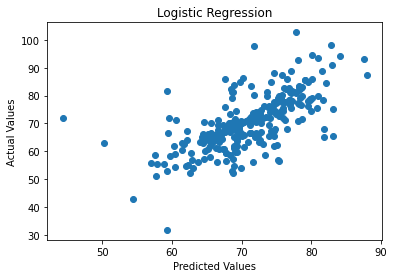

In [ ]:
plt.scatter(y_pred,y_test)
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.title("Logistic Regression")

### Model 3: Bagging Regressor

In [ ]:
model = BaggingRegressor()
clf = BaggingRegressor(base_estimator=SVR(),
                        n_estimators=10, random_state=0).fit(X_train, y_train)

/Users/sabeekakhan/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_bagging.py:429: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)


In [ ]:
###Evaluation on training data
y_pred = clf.predict(X_train)

print("Evaluation on training data")
print("MAE",mean_absolute_error(y_train,y_pred))
print("MSE",mean_squared_error(y_train,y_pred))

r2 = r2_score(y_train,y_pred)
print("R2 score",r2)
print()
###Evaluation on testing dataset
y_pred = clf.predict(X_test)

print("Evaluation on testing data")
print("MAE",mean_absolute_error(y_test,y_pred))
print("MSE",mean_squared_error(y_test,y_pred))

r2 = r2_score(y_test,y_pred)
print("R2 score", r2)

Evaluation on training data
MAE 4.816666097405894
MSE 55.556926190355924
R2 score 0.4304555645128816

Evaluation on testing data
MAE 4.599265178021838
MSE 54.027214796853166
R2 score 0.4391854907225897


Text(0.5, 1.0, 'Bagging Regressor')

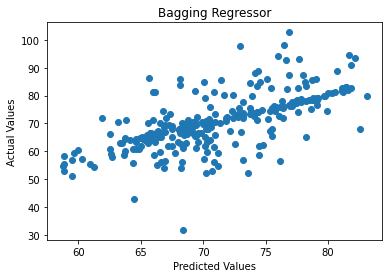

In [ ]:
plt.scatter(y_pred,y_test)
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.title("Bagging Regressor")

## Predicting Age at death as a categorical variable

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

category = label_encoder.fit_transform(pd.cut(death_df['Age at Death'], 5, retbins=True)[0])
death_df['Categorial Age at Death'] = category

In [ ]:
death_df['Categorial Age at Death'].value_counts()

2    444
3    399
1     54
4     50
0      2
Name: Categorial Age at Death, dtype: int64

In [ ]:
X = np.array(death_df.iloc[:,2:13])
Y = np.array(death_df.iloc[:,-1])

Y = Y.reshape(-1,1)



In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y, test_size = 0.20)

### Model 1: Random forest


In [ ]:
clf = RandomForestClassifier(n_estimators = 100) 

clf.fit(X_train, y_train)

/var/folders/f0/16ccpfvn15x4cfm0wxybq2mw0000gn/T/ipykernel_95046/451287631.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


RandomForestClassifier()

In [ ]:
y_pred = clf.predict(X_train)
 
print("TRAINING ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_train, y_pred))

y_pred = clf.predict(X_test)
 
print("TESTING ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred))

TRAINING ACCURACY OF THE MODEL:  1.0
TESTING ACCURACY OF THE MODEL:  0.7421052631578947


<AxesSubplot:>

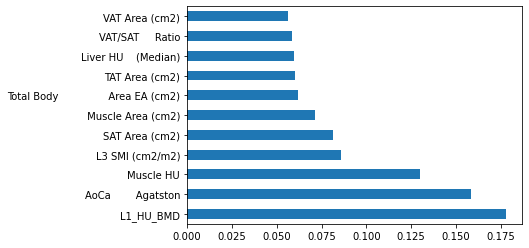

In [ ]:
feat_importances = pd.Series(clf.feature_importances_, index=death_df.columns[2:13])
feat_importances.nlargest(20).plot(kind='barh')

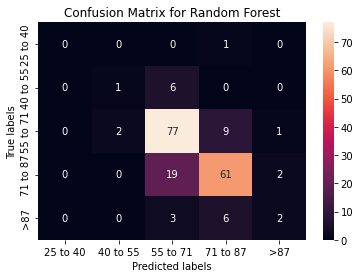

In [ ]:
ax= plt.subplot()
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='g', ax=ax);
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix for Random Forest'); 
ax.xaxis.set_ticklabels(['25 to 40', '40 to 55','55 to 71','71 to 87','>87']); ax.yaxis.set_ticklabels(['25 to 40', '40 to 55','55 to 71','71 to 87','>87']);

### Model 2:  Logistic Regression

In [ ]:
clf = LogisticRegression()
clf.fit(X_train, y_train)
print('Training accuracy:', clf.score(X_train, y_train))
print('Test accuracy:', clf.score(X_test, y_test))
print('')

Training accuracy: 0.7075098814229249
Test accuracy: 0.7105263157894737



/Users/sabeekakhan/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/sabeekakhan/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
y_pred = clf.predict(X_train)
 
print("TRAINING ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_train, y_pred))

y_pred = clf.predict(X_test)
 
print("TESTING ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred))

TRAINING ACCURACY OF THE MODEL:  0.7075098814229249
TESTING ACCURACY OF THE MODEL:  0.7105263157894737


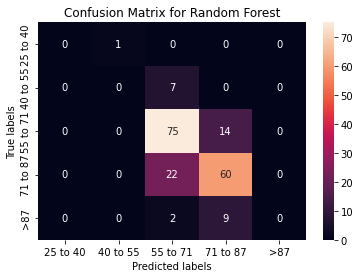

In [ ]:
ax= plt.subplot()
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='g', ax=ax);
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix for Random Forest'); 
ax.xaxis.set_ticklabels(['25 to 40', '40 to 55','55 to 71','71 to 87','>87']); ax.yaxis.set_ticklabels(['25 to 40', '40 to 55','55 to 71','71 to 87','>87']);

In [ ]:
# C = [10, 1, .1, .001]
# for c in C:
    
#     clf = LogisticRegression(penalty='l1', C=c, solver='liblinear')
#     clf.fit(X_train, y_train)
#     print('Training accuracy:', clf.score(X_train, y_train))
#     print('Test accuracy:', clf.score(X_test, y_test))
#     print('')

### Model 3: Bagging Classfier

In [ ]:
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier

clf = BaggingClassifier(base_estimator=SVC(),
                        n_estimators=10, random_state=0).fit(X_train, y_train)


/Users/sabeekakhan/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_bagging.py:719: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
y_pred = clf.predict(X_train)
 
print("TRAINING ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_train, y_pred))

y_pred = clf.predict(X_test)
 
print("TESTING ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred))

TRAINING ACCURACY OF THE MODEL:  0.7720685111989459
TESTING ACCURACY OF THE MODEL:  0.7210526315789474


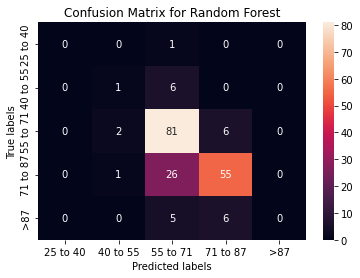

In [ ]:
ax= plt.subplot()
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='g', ax=ax);
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix for Random Forest'); 
ax.xaxis.set_ticklabels(['25 to 40', '40 to 55','55 to 71','71 to 87','>87']); ax.yaxis.set_ticklabels(['25 to 40', '40 to 55','55 to 71','71 to 87','>87']);

### Testing on alive patients

In [ ]:
df = pd.read_excel('OppScrData.xlsx')  
df = df.iloc[: , :52]

In [ ]:
df_filtered =  df.iloc[:, 41:52]
df_filtered["DEATH [d from CT]"] = df["DEATH [d from CT]"]
df_filtered["Age at CT"] = df["Age at CT"]
df_filtered["DEATH [d from CT]"] = df_filtered["DEATH [d from CT]"].fillna(0)
df_filtered["Clinical F/U interval  [d from CT]"] = df["Clinical F/U interval  [d from CT]"]
df_filtered['Current Age'] = df_filtered["Age at CT"] + df_filtered["Clinical F/U interval  [d from CT]"]/365

df_filtered.head()

,L1_HU_BMD,TAT Area (cm2),Total Body Area EA (cm2),VAT Area (cm2),SAT Area (cm2),VAT/SAT Ratio,Muscle HU,Muscle Area (cm2),L3 SMI (cm2/m2),AoCa Agatston,Liver HU (Median),DEATH [d from CT],Age at CT,Clinical F/U interval [d from CT],Current Age
0,135.0,NaN,NaN,NaN,NaN,NaN,18.242557,170.053192,58.717526,5473.561,35,967.0,73,907,75.484932
1,192.0,485.502857,694.314286,183.497143,302.008571,0.607589,16.150123,123.968745,48.413187,2709.064,52,359.0,55,359,55.983562
2,256.0,490.054545,706.051515,159.706061,330.348485,0.483447,23.337964,136.566261,50.101332,0.000,54,0.0,52,412,53.128767
3,149.0,289.108108,584.489189,144.002703,145.102703,0.992419,30.804567,212.296726,69.115854,2586.575,57,2351.0,60,2333,66.391781
4,106.0,315.530769,588.892308,202.317949,113.212821,1.787059,-3.181874,168.923950,47.814581,431.519,53,658.0,88,532,89.457534


In [ ]:
alive_df = df_filtered[df_filtered['DEATH [d from CT]']==0]

In [ ]:
for i in range(13):
    alive_df.iloc[:,i] = pd.to_numeric(alive_df.iloc[:,i], errors='coerce')
for i in range(11):
    alive_df.iloc[:,i].fillna(value=alive_df.iloc[:,i].mean(),inplace = True)

/var/folders/f0/16ccpfvn15x4cfm0wxybq2mw0000gn/T/ipykernel_95046/407432531.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  alive_df.iloc[:,i] = pd.to_numeric(alive_df.iloc[:,i], errors='coerce')


In [ ]:
Alive_X = np.array(alive_df.iloc[:,0:11])
#Y = np.array(death_df.iloc[:,-1])


In [ ]:
y_Alive = clf.predict(Alive_X)

In [ ]:
y_Alive

array([2, 2, 2, ..., 2, 2, 2])

In [ ]:
final_predictions = []
for i in range(len(y_Alive)):
    if y_Alive[i] == 0:
        final_predictions.append([24.684, 40.363])
    elif y_Alive[i] == 1:
        final_predictions.append([40.363, 55.965])
    elif y_Alive[i] == 2:
        final_predictions.append([55.965, 71.567])
    elif y_Alive[i] == 3:
        final_predictions.append([71.567, 87.168])
    elif y_Alive[i] == 4:
        final_predictions.append([87.168, 102.77])

In [ ]:
final_predictions1 = []
for i in range(len(y_Alive)):
    if y_Alive[i] == 0:
        final_predictions1.append(40.363)
    elif y_Alive[i] == 1:
        final_predictions1.append(55.965)
    elif y_Alive[i] == 2:
        final_predictions1.append(71.567)
    elif y_Alive[i] == 3:
        final_predictions1.append(87.168)
    elif y_Alive[i] == 4:
        final_predictions1.append(102.77)

In [ ]:
alive_df["Predicted Age at Death Range"] = final_predictions

/var/folders/f0/16ccpfvn15x4cfm0wxybq2mw0000gn/T/ipykernel_95046/3831000055.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  alive_df["Predicted Age at Death Range"] = final_predictions


In [ ]:
alive_df["Predicted Maximum Age at Death"] = final_predictions1

/var/folders/f0/16ccpfvn15x4cfm0wxybq2mw0000gn/T/ipykernel_95046/1450698696.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  alive_df["Predicted Maximum Age at Death"] = final_predictions1


In [ ]:
alive_df[alive_df['Current Age'] < alive_df['Predicted Maximum Age at Death']].shape[0]

7052

In [ ]:
"Percentage of people who are still alive and haven't reached the maximum age at death limit"
print(alive_df[alive_df['Current Age'] < alive_df['Predicted Maximum Age at Death']].shape[0]/alive_df.shape[0])

0.813004380908462


In [ ]:
alive_df[alive_df['Predicted Maximum Age at Death']==71.567].shape[0]
x = list(range(0, alive_df[alive_df['Predicted Maximum Age at Death']==71.567].shape[0]))

Text(0.5, 1.0, 'Patients assigned 55 to 71 Death Age Range')

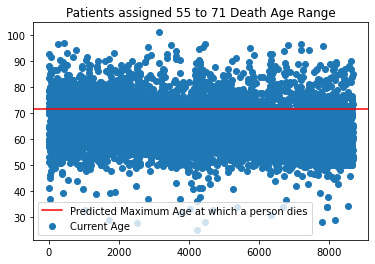

In [ ]:
plt.scatter( x,alive_df[alive_df['Predicted Maximum Age at Death']==71.567]['Current Age'],label="Current Age")
plt.axhline(y=71.567, color='r', linestyle='-',label = "Predicted Maximum Age at which a person dies")
plt.legend()
plt.title("Patients assigned 55 to 71 Death Age Range")